#Bon, qu'est-ce que t'as foutu pendant 3 ans ??

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

####Crunchons un peu tout ça... (Faut bien que ça serve à quelque chose de se casser le c.. à reporter pendant 3 ans...

Data loading...

In [2]:
TR = "timereporting_2012-10-15_2015-09-30.csv"
time_reporting = pd.read_csv(TR, 
                             parse_dates=True, 
                             #index_col=0,
                             usecols=["DATE", "WHO", "TYPE", "DURATION", "ACCOUNT", "TASK", "SUBTASK", "BILLED", "CODE", "OWNER"],
                             sep=';'
                             #dtype={"DURATION": np.float32}
                            )
time_reporting["DURATION"] = time_reporting["DURATION"].replace(",", ".").astype(float)
time_reporting.head(1)

,DATE,WHO,TYPE,DURATION,ACCOUNT,TASK,SUBTASK,BILLED,CODE,OWNER
0,31/12/13,Report2013,Report,16.23,ARTE GEIE mars 2013,Report des taches 2013,Report des taches 2013,1,ARTE,OphelieMicoine


WTF !!! Pas de données pour 2012... ;/ (Les données ont été regroupées dans 2013)

####Débarassons-nous des autres...

In [4]:
MC = time_reporting[time_reporting["OWNER"] == "MarieChristineBoyer"]
MC.head(1)

,DATE,WHO,TYPE,DURATION,ACCOUNT,TASK,SUBTASK,BILLED,CODE,OWNER
23,31/12/13,Report2013,Report,1.285,Humanis Agir pour le care,Report des taches 2013,Report des taches 2013,1,HUMANIS,MarieChristineBoyer


hum hum.... ça commence à devenir intéressant...

In [4]:
MC["TASK"].count()

1014

**>** T'as donc reporté **1014 fois** pendant tout ce temps, mouai, pas mal... ;) (Bon en vérité c'est plus je pense car il y a des regroupements pour 2012/2013)
<br><br>
***Ca fait combien de jour travaillés en tout ça ?***

In [5]:
MC["DURATION"].sum()

526.94299999999998

In [6]:
527/35

15

**>** **527 jours** sur trois ans (sur 35 mois pour être précis), ou **15j** par mois ! (la base c'est 20 je crois mais ça doit correspondre à la moyenne lissée avec les 5 semaines de congés + rtt) 

**>** Soit **1267h/an** ***** ! (bon contre <a href="https://www.service-public.fr/particuliers/vosdroits/F1911">**1607h** de durée légale par an</a> pour un contrat de 35h mais on va dire que j'ai fait des oublis quelque part... ;)
***** en considérant 1j = 7,2h

Et si on mettait tout ça en relief un peu...

***Ca donne quoi en répartition par client ?***

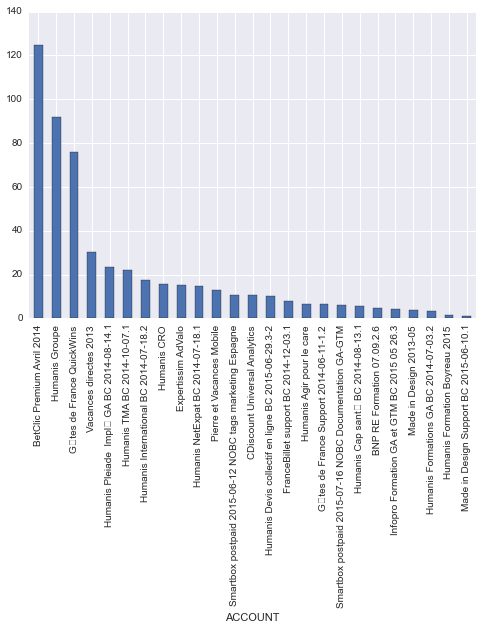

In [7]:
MC_client = MC["DURATION"].groupby(MC["ACCOUNT"])
MC_client.sum().order(ascending=False).plot(kind="bar")

Ouai pas très lisible...

**Top 5 ?**

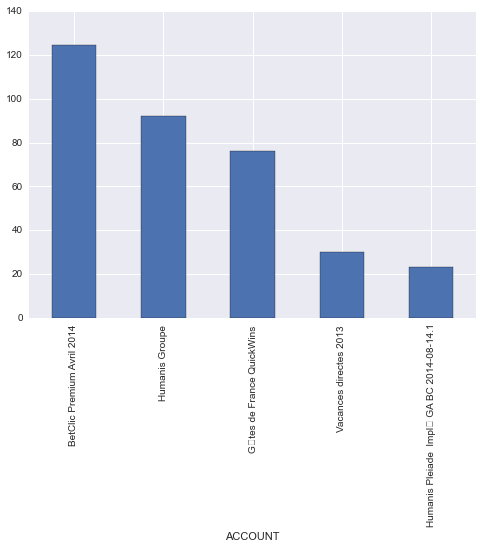

In [8]:
MC_client = MC["DURATION"].groupby(MC["ACCOUNT"])
MC_client.sum().order(ascending=False).head(5).plot(kind="bar")

**Quoi ? Humanis n'est que 2eme ?!?!?**

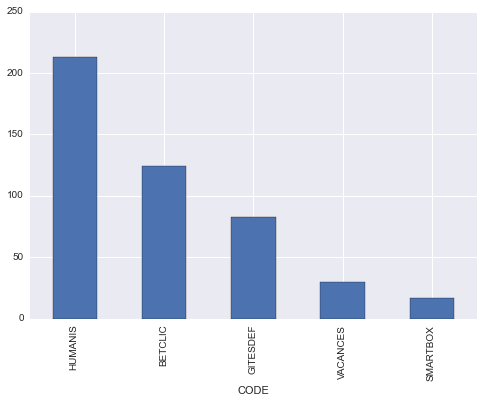

In [9]:
Humanis = MC["DURATION"].groupby(MC["CODE"])
Humanis.sum().order(ascending=False).head(5).plot(kind="bar")

Ah non, **213 jours** de recettes Humanis et une première place retrouvée ;), me voilà rassuré.....

Tiens en parlant de ça, t'en as fait combien d'heures de recettes ?

TASK
False    511.324
True      15.619
Name: DURATION, dtype: float64

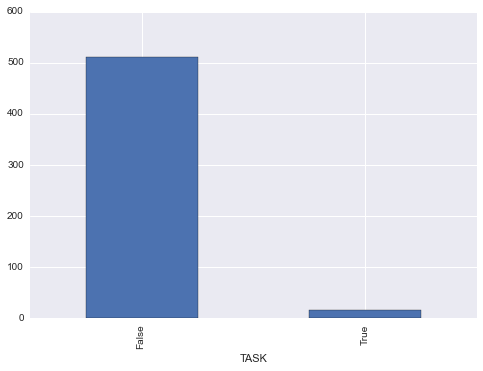

In [10]:
recette = MC["DURATION"].groupby(MC["TASK"].str.contains("Recette"))
recette.sum().plot(kind="bar")
recette.sum()

**15j** de recettes 'officielles' d'après la ligne du Time Reporting approprié, loin de la réalité non ? (Oui bon je me suis pas amusé à prendre tous tes commentaires de tâches et à chercher 'recette à l'intérieur'...)

Bon en fait si je vais le faire ça peut être marrant...

In [11]:
TR = "recette.csv"
recette = pd.read_csv(TR, 
                             parse_dates=True, 
                             #index_col=0,
                             usecols=["DATE", "DURATION", "ACCOUNT", "TASK", "SUBTASK", "BILLED", "COMMENT", "CODE", "OWNER"],
                             sep=';'
                             #dtype={"DURATION": np.float32}
                            )
recette.head(1)

,DATE,DURATION,ACCOUNT,TASK,SUBTASK,BILLED,COMMENT,CODE,OWNER
0,31/12/13,1.285714,Humanis Agir pour le care,Report des taches 2013,Report des taches 2013,1,NaN,HUMANIS,MarieChristineBoyer


Je prends soin de supprimer les lignes 'officielles' Recettes pour ne pas prendre les **15j** déjà identifiés en doublons !

In [12]:
Recettes = recette[recette["TASK"] != "Recettes"]

COMMENT
False    180.750000
True      26.571429
Name: DURATION, dtype: float64

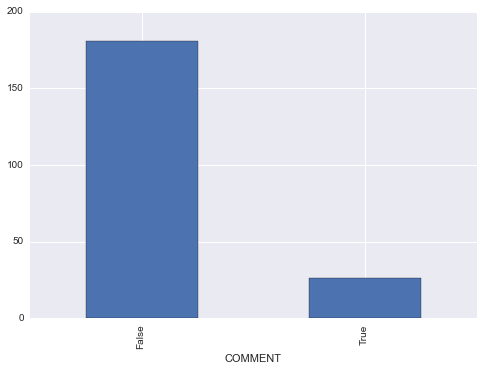

In [13]:
recette_comment = Recettes["DURATION"].groupby(Recettes["COMMENT"].str.contains("Recette|recette"))
recette_comment.sum().plot(kind="bar")
recette_comment.sum()

Ahh !!!! Et bim **26j** de recettes de trouvés en plus ;) Ce qui porte le total à 15+26 = **41j** de recettes !! Réaliste ?

**Et au téléphone, combien d'heures tu y as passé ??**

COMMENT
False    184.690476
True      30.047619
Name: DURATION, dtype: float64

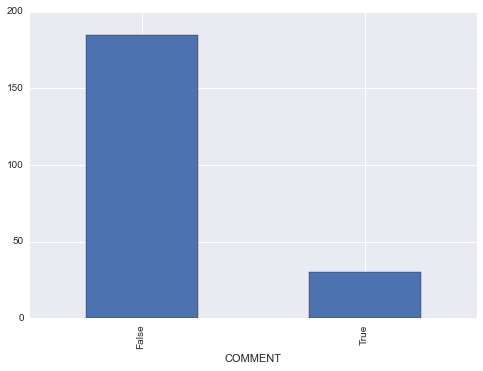

In [14]:
phone = recette["DURATION"].groupby(recette["COMMENT"].str.contains("call|Call|appel|tel|Tel"))
phone.sum().plot(kind="bar")
phone.sum()

**WHATTTTTTTTTTTTT ????????????** L'équivalent de **30j** au tel !!!! Dingo.....

**Et ta répartition des tâches en général ?**

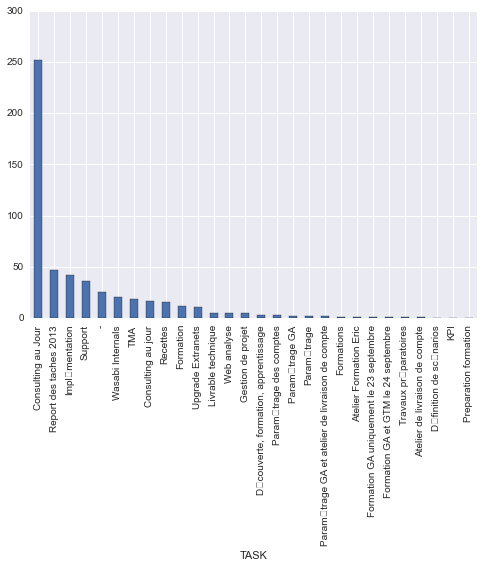

In [15]:
repartition_tache = MC["DURATION"].groupby(MC["TASK"])
repartition_tache.sum().order(ascending=False).plot(kind="bar")

La reine du conseil ;)

**Pour faire plaisir à nos chers boss, c'est quoi ta répartition facturé / pas facturé ?**

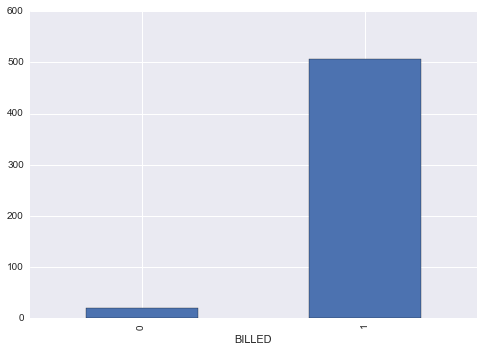

In [16]:
productivity = MC["DURATION"].groupby(MC["BILLED"])
productivity.sum().plot(kind="bar")

**506j** de facturation, quelle productivité de feu !!!

In [17]:
506*900

455400

En prenant le postulat que tous mes calculs _hâtifs_ soient justes, tu as donc rapporté environ **455 400€** à l'entreprise sur 35 mois, soit **13 000€** par mois! <br>
(_C'était quoi ton salaire déjà ?? ;)_ )

**Bon allez, une petite dernière question pour la route... <br>
Combien de temps on a _durement_ travaillé ensemble (points Frosmo....) ?**

COMMENT
False    210.964286
True       3.773810
Name: DURATION, dtype: float64

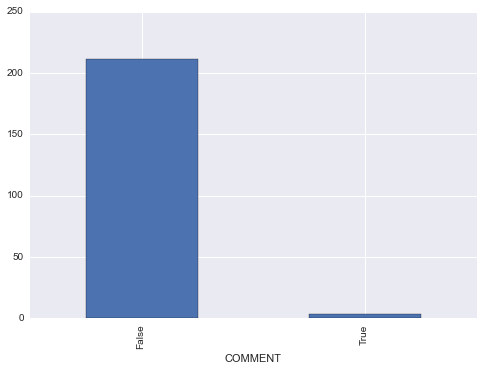

In [18]:
together = recette["DURATION"].groupby(recette["COMMENT"].str.contains("JZ|jz|ju"))
together.sum().plot(kind="bar")
together.sum()

En trois ans t'as reporté moins de **4j** avec moi....Si en plus on enlève les réu prod pour lesquelles je suis cité... (Manque quand même ton bootcamp en 2012 où on avait passé un peu de temps ensemble me semble-t-il)<br><br>

Eh, promis, la prochaine fois qu'on se retrouve dans la même boîte on fait mieux !! ;)

<img src="files/MC_Minnie2.jpg">

Quant à moi, avant de faire la même chose me concernant, je vais déjà rajouter quelques heures en improductif ;)